Градиентные алгоритмы оптимизации

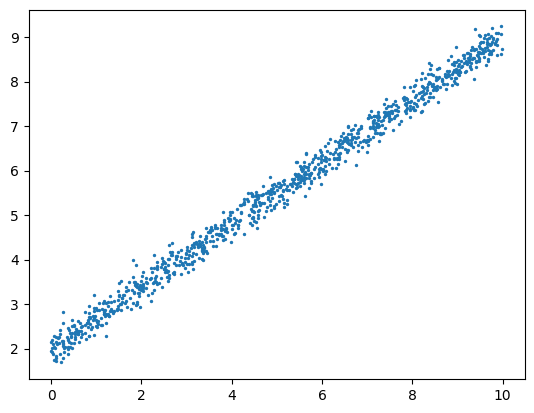

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

TOTAL_POINTS = 1000

x = tf.random.uniform(shape = [TOTAL_POINTS], minval=0, maxval=10)
noise = tf.random.normal(shape=[TOTAL_POINTS], stddev=0.2)

k_true = 0.7
b_true = 2.0

y = x*k_true + b_true + noise
plt.scatter(x,y, s=2)
plt.show()

In [ ]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

EPOCHS = 50
learning_rate = 0.02

In [ ]:
for n in range(EPOCHS):
    with tf.GradientTape() as t:
        f = k*x +b
        loss = tf.reduce_mean(tf.square(y-f))
    dk, db = t.gradient(loss, [k,b])

    k.assign_sub(learning_rate*dk)
    b.assign_sub(learning_rate*db)

print(k,b, sep='\n')

y_pr = k*x+b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.70466816>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9999392>


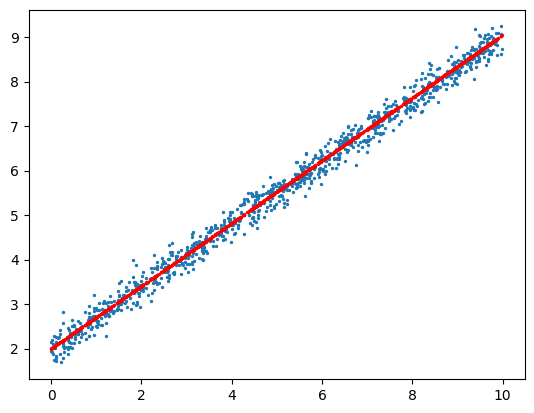

In [4]:
BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]

        with tf.GradientTape() as t:
            f = k*x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch-f))

        dk, db = t.gradient(loss, [k,b])
        k.assign_sub(learning_rate*dk)
        b.assign_sub(learning_rate*db)

print(k,b, sep='\n')

y_pr = k*x+b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()
        

